<a href="https://colab.research.google.com/github/nickdhollman/MS-BAnDS-Google-Colab/blob/BAN-5743-Predictive-Analytics/Self_Organizing_Maps_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Install MiniSom

In [ ]:
!pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12042 sha256=818c742dc0a267a9d20728a967035cd0a9fa3d845c2bf54e8636780058ff73a2
  Stored in directory: c:\users\nickd\appdata\local\pip\cache\wheels\0f\8c\a4\5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


Import the packages

In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

Import and preprocess the Iris dataset

In [ ]:
dataset_iris = datasets.load_iris()
data_iris = dataset_iris.data
target_iris = dataset_iris.target
data_iris_normalized = MinMaxScaler().fit_transform(data_iris)
labels_iris = {1:'1', 2:'2', 3:'3'}

data = data_iris_normalized
target = target_iris


Declare the dimensions of the SOM

In [ ]:
SOM_X_AXIS_NODES  = 8
SOM_Y_AXIS_NODES  = 8
SOM_N_VARIABLES  = data.shape[1]


Declare constants for other hyperparameters

In [ ]:
ALPHA = 0.5
DECAY_FUNC = 'linear_decay_to_zero'
SIGMA0 = 1.5
SIGMA_DECAY_FUNC = 'linear_decay_to_one'
NEIGHBORHOOD_FUNC = 'triangle'
DISTANCE_FUNC = 'euclidean'
TOPOLOGY = 'rectangular'
RANDOM_SEED = 123


Define the map

In [ ]:
som = MiniSom(
        SOM_X_AXIS_NODES,
        SOM_Y_AXIS_NODES,
        SOM_N_VARIABLES,
        sigma=SIGMA0,
        learning_rate=ALPHA,
        neighborhood_function=NEIGHBORHOOD_FUNC,
        activation_distance=DISTANCE_FUNC,
        topology=TOPOLOGY,
        sigma_decay_function = SIGMA_DECAY_FUNC,
        decay_function = DECAY_FUNC,
        random_seed=RANDOM_SEED,
        )


C:\Users\nickd\Anaconda\Lib\site-packages\minisom.py:235: UserWarning: sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function
  warn('sigma should be an integer >=1 when triangle or bubble' +


Initialize the weights

In [ ]:
som.pca_weights_init(data)


C:\Users\nickd\Anaconda\Lib\site-packages\minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


Train the SOM

In [ ]:
N_ITERATIONS = 5000
som.train_random(data, N_ITERATIONS, verbose=True)


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.055292768075146104


Plot the U-matrix of the distance map to visualize the neurons

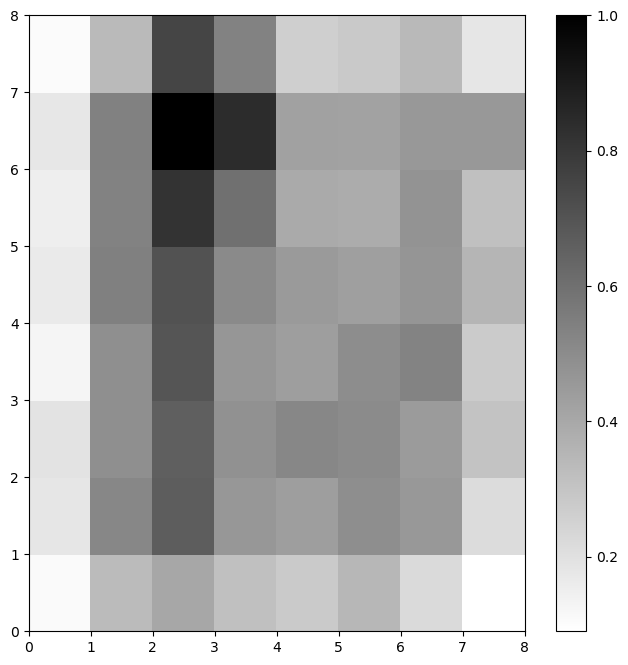

In [ ]:
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='gist_yarg')
plt.colorbar()
plt.show()


Plot the class markers on top of the distance-map to visualize the clustering results

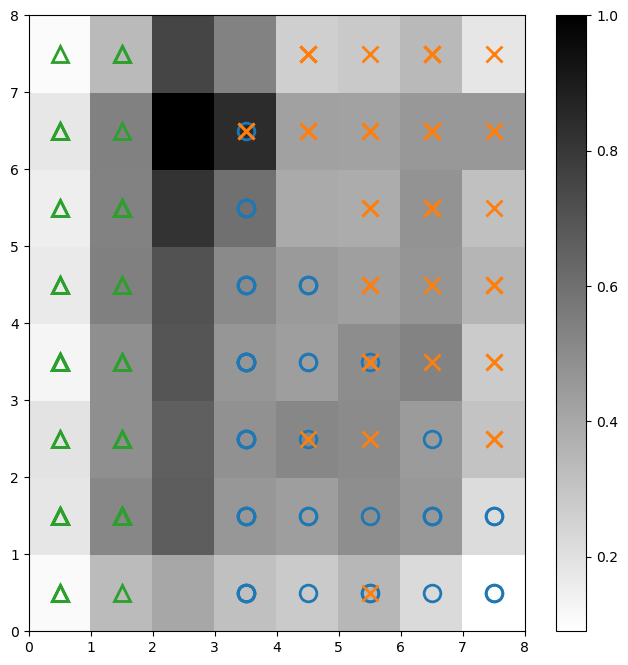

In [ ]:
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='gist_yarg')
plt.colorbar()

markers = ['o', 'x', '^']
colors = ['C0', 'C1', 'C2']
for count, datapoint in enumerate(data):
    # get the winner
    w = som.winner(datapoint)
    # place a marker on the winning position for the sample datapoint
    plt.plot(w[0]+.5, w[1]+.5, markers[target[count]-1], markerfacecolor='None',
             markeredgecolor=colors[target[count]-1], markersize=12, markeredgewidth=2)
plt.show()


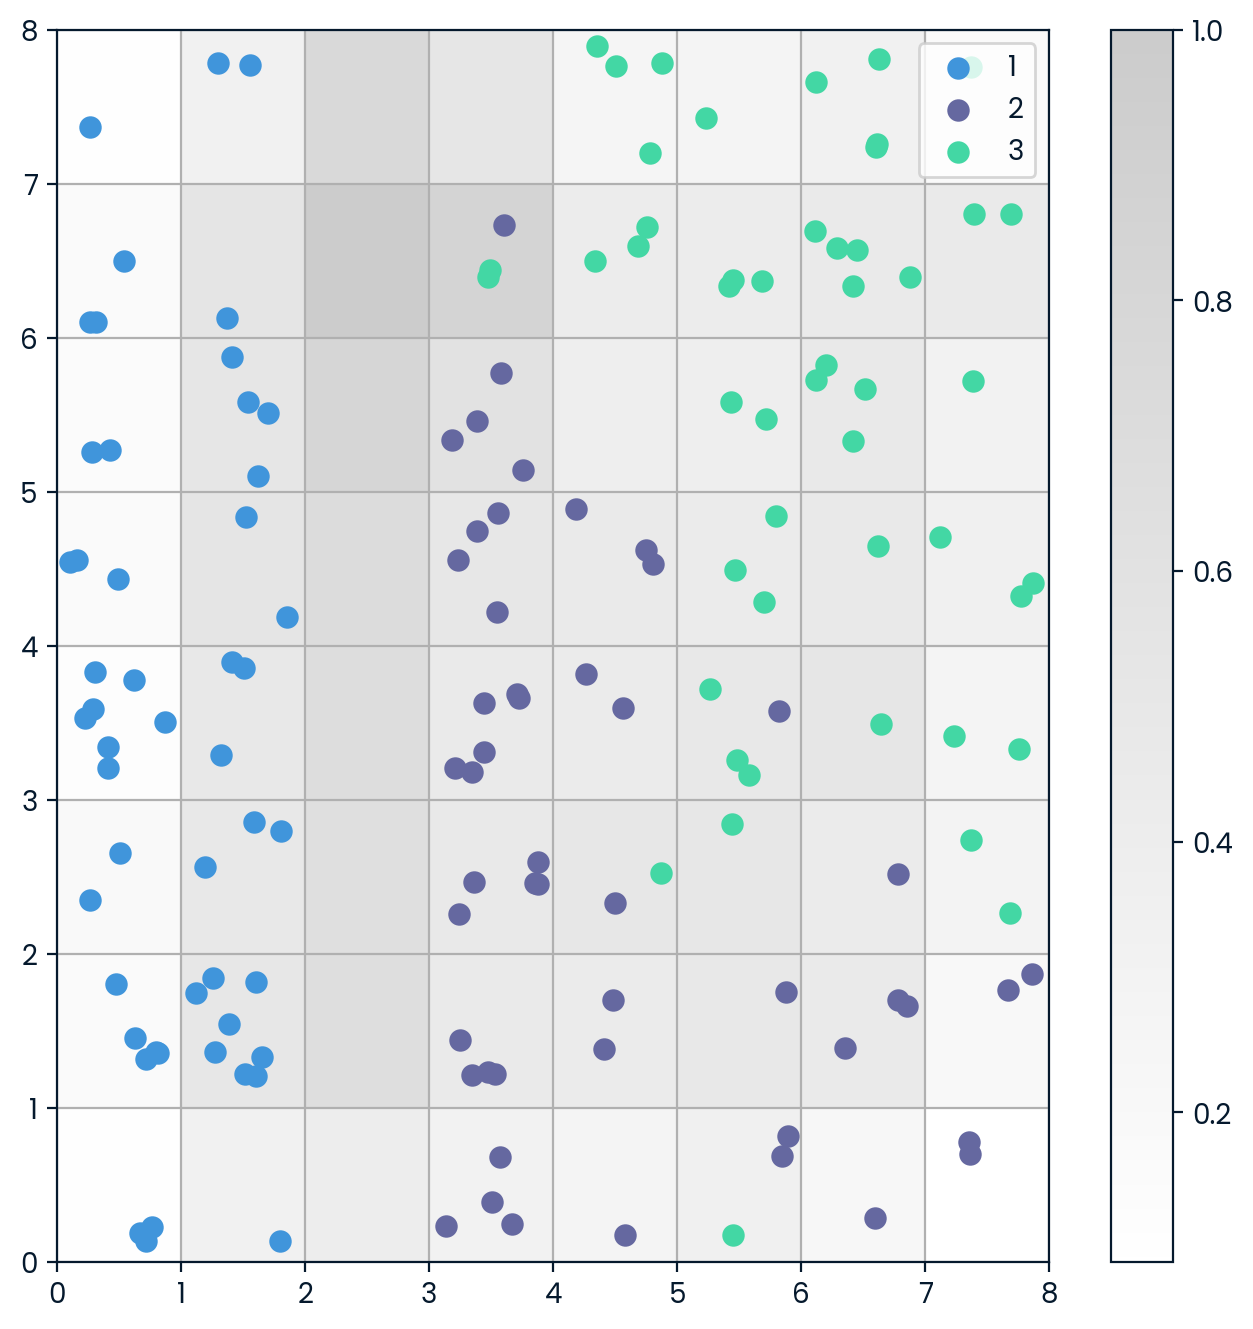

In [ ]:
# get the X and Y coordinates of the winning neurons for each data point
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

# plot the distance map
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='gist_yarg', alpha=.2)
plt.colorbar()

# make a scatter plot of all the winning neurons for each data point
# add a random offset to each point to avoid overlaps
for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50,
                c=colors[c-1],
                label=labels_iris[c+1]
                )
plt.legend(loc='upper right')
plt.grid()
plt.show()
